2.5000000000000004


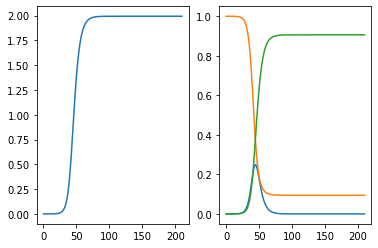

In [135]:
import matplotlib.pyplot as plt


def dsdt(state,transm):
    (I,S,R)=state
    return -transm*S*I

def didt(state,transm, recov):
    (I,S,R)=state
    return transm*S*I-recov*I

def drdt(state,recov):
    (I,S,R)=state
    return recov*I

def update(state,transm, recov):
    (I,S,R)=state
    Inew = min(1,max(0,I + didt(state, transm,recov)))
    Snew = min(1,max(0,S + dsdt(state, transm)))
    Rnew = min(1,max(0,R + drdt(state, recov)))
    return (Inew,Snew,Rnew)


IStart = 0.00001 # Infected
SStart = 1-IStart # Susceptible
RStart = 0 # Recovered
mortality = 0.022
def run(transm,recov):
    I=IStart
    S=SStart
    R=RStart
    results = [(I,S,R)]
    for i in range(7*30):
        #print(I,S,R)
        (I,S,R)=update((I,S,R),transm,recov)
        results.append((I,S,R))
    fig, axs = plt.subplots(1,2)
    #ax.plot([i*100000 for (i,_,_) in results])
    axs[0].plot([r*mortality*100 for (i,_,r) in results])
    axs[1].plot(results)
    #ax.legend(['Infected','Susceptible','Recovered'])
    

transm = 0.5 # transmission rate
recov = (1-0.80) # recovery rate
print(transm/recov)
# I think this yields R_0 = 2.5
run(transm,recov)    
